In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
from pyswmm import Simulation, Nodes
from swmmio import Model

from StormReactor.waterQualityParams import WQParams
from StormReactor import WQConfig
from StormReactor.utils import get_conduit_volume
from StormReactor import waterQuality, WQStorage

#inp_file = 'StormReactor/examples/Example1_WQ.inp'
inp_file = r"C:\Users\everett\Documents\GitHub\sewmod\dat\wet_calibration\wet_CALIBRATION.inp"
mdl = Model(inp_file)
wqp = WQParams()


configs = []

conduit_volumes = get_conduit_volume(mdl)

for link in mdl.links().index.tolist():
    config = WQConfig(
        element_id=link,
        element_type='link',
        pollutant='tss1',
        method='SewageFlux',
        parameters=wqp.SewageFlux(
            Qhalf=1.5,
            v_sett=0.000001,
            Smax=conduit_volumes[link] * 1000,
            Resus_max=24*24*3600,
            n=4),
        model=mdl)
    
    configs.append(config)

# Create lists to save TSS results
UpstreamNode_TSS = []
WQNode_TSS = []
OutfallNode_TSS = []
ok = []

# Initalize SWMM simulation
with Simulation(inp_file) as sim:
    # Node information
    #UpstreamNode = Nodes(sim)['24']
    #WQNode = Nodes(sim)['17']
    #OutfallNode = Nodes(sim)['18']

    # Initialize StormReactor
    WQ = waterQuality(sim, configs)

    # Launch a simulation
    for step in sim:
        # Update water quality each simulation step
        WQ.updateWQState()
        ok.append(WQ.storage.df.iloc[0,0])
        # Get and save TSS concentrations
        #UpstreamNode_TSS.append(UpstreamNode.pollut_quality['TSS'])
        #WQNode_TSS.append(WQNode.pollut_quality['TSS'])
        #OutfallNode_TSS.append(OutfallNode.pollut_quality['TSS'])
        
# Plot TSS concentrations
plt.plot(ok)
plt.xlabel("Time")
plt.ylabel("TSS (mg/L)")
plt.legend()
plt.show()


C:\Users\everett\AppData\Local\Temp\ipykernel_29348\2374025508.py:53: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


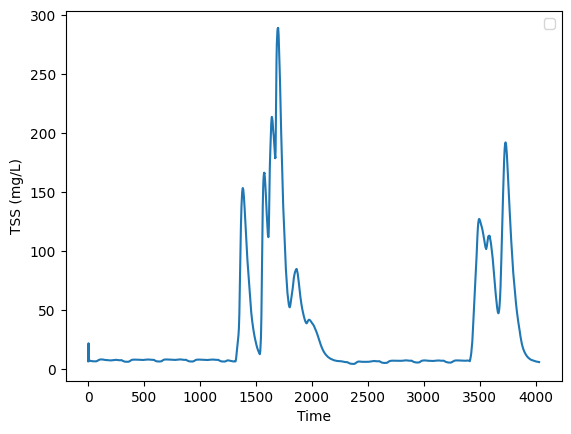

In [3]:
WQ.storage.df.iloc[0,0]

np.float64(20626.180030594598)

In [4]:
resus = []
Q = [1,2,1,1,2,1,2,1,1,1,1,1,2,1,3,4,5,6,7,8,9,21,43,21,11,2,1,2,3,2,1]
for Qt in Q:
    resus.append(10 * Qt/(Qt+1))


In [5]:
Q[19]

8

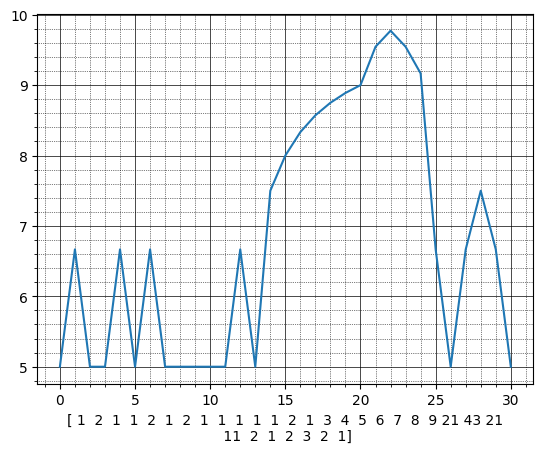

In [6]:
import numpy as np
plt.plot(resus)
plt.xlabel(np.array(Q))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.minorticks_on()
plt.show()